In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
url = 'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Ice%20Cream.csv'

df=pd.read_csv(url)
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [ ]:
df.head(10)

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
5,14.4,368
6,13.8,309
7,30.9,697
8,1.0,56
9,31.7,738


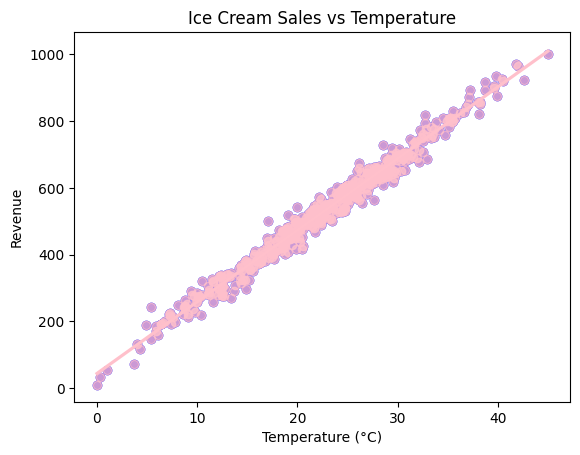

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['Temperature'], df['Revenue'], color='blue')
# Regression plot
sns.regplot(x='Temperature', y='Revenue', data=df, color='pink')

# Adding labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue')
plt.title('Ice Cream Sales vs Temperature')

# Show the plot
plt.show()


In [ ]:
correlation=df['Temperature'].corr(df['Revenue'])
correlation

np.float64(0.9898407817416826)

In [ ]:
df.isnull().sum()

,0
Temperature,0
Revenue,0


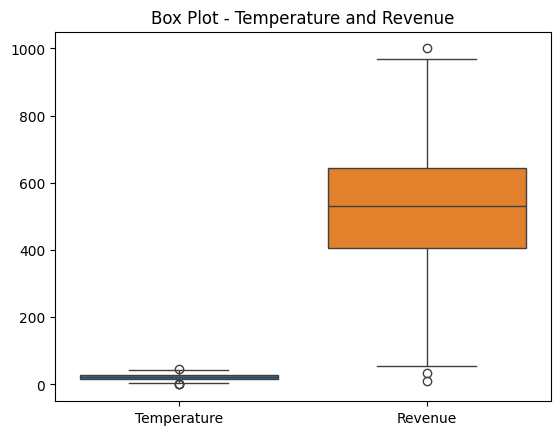

In [ ]:
sns.boxplot(data=df[['Temperature', 'Revenue']])
plt.title("Box Plot - Temperature and Revenue")
plt.show()


# training

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
X = df[['Temperature']]  # keep it 2D with double brackets
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
print("Slope (coefficient):", model.coef_)
print("Intercept:", model.intercept_)


Slope (coefficient): [21.44196092]
Intercept: 44.296803484425595


In [ ]:
model.score(X_test,y_test)

0.9771509516333023

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

     Actual   Predicted
361     660  683.421568
73      624  632.099966
374     560  559.394363
155     498  499.519161
104     628  614.992765


evaluating metrics
# New Section

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 652.4938284912412


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9771509516333023


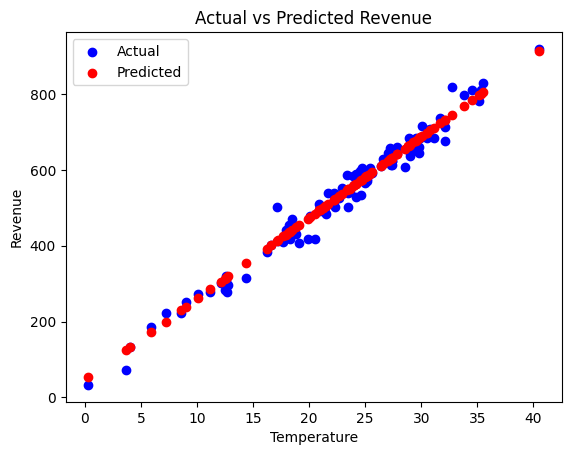

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.show()
